# Profitable App Profiles for the App Store and Google Play Markets

Our goal for this project is to analyze data to understand what type of apps are likely to attract more users.We will be doing this project using regular Python and not Pandas or any other library. This will help us to practice Python. Later on we will do this project again using Pandas which will help us to understand how Pandas make Python more powrfull and esay.

## Opening and Exploring Data

To do this project, we will need to collect and analyze data about mobile apps available on Google Play and the App Store.

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

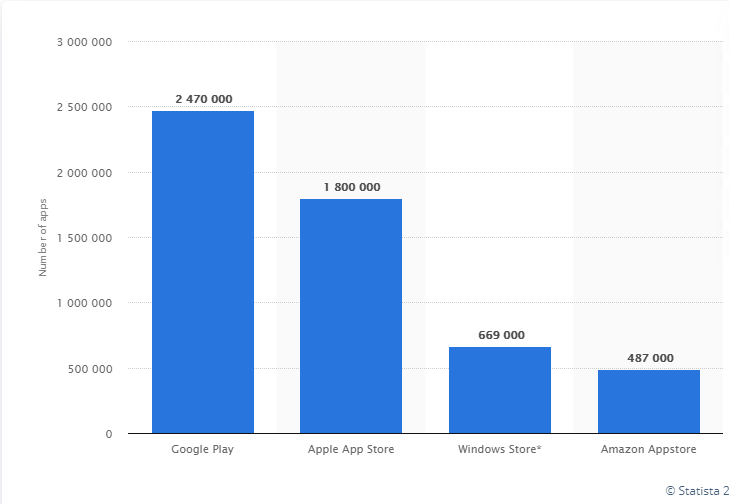

Collecting data for over 4 million apps requires a significant amount of time and money, so we'll try to analyze a sample of the data instead. To avoid spending resources on collecting new data ourselves, we should first try to see if we can find any relevant existing data at no cost. Luckily, these are two data sets that seem suitable for our goals:

[A data set](https://www.kaggle.com/lava18/google-play-store-apps) containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018. You can download the data set directly from this [Link](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv).
[A data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017. You can download the data set directly from this [Link](https://dq-content.s3.amazonaws.com/350/AppleStore.csv).

Let's start by opening the two data sets and then continue with exploring the data.

In [16]:
from csv import reader

#Google Play Data set
opened_file = open('googleplaystore.csv',encoding='utf8')
read_file = reader(opened_file)
android = list(read_file)                               #Making file as list of lists
android_header = android[0]                             #Our file contains a header which we dont want while doing analysis so we will remove header in 2 steps
android = android[1:]


#Applestore Data set
opened_file = open('Applestore.csv',encoding='utf8')
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios = ios[1:]


To make it easier to explore the two data sets, we'll first write a function named explore_data() that we can use repeatedly to explore rows in a more readable way. We'll also add an option for our function to show the number of rows and columns for any data set.

In [18]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line between rows
        
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

print(android_header)
print('\n')
explore_data(android, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


We see that the Google Play data set has 10841 apps and 13 columns. At a quick glance, the columns that might be useful for the purpose of our analysis are 'App', 'Category', 'Reviews', 'Installs', 'Type', 'Price', and 'Genres'.

Now let's take a look at the App Store data set.

In [19]:
print(ios_header)
print('\n')
explore_data(ios, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


We have 7197 iOS apps in this data set, and the columns that seem interesting are: 'track_name', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', and 'prime_genre'. Not all column names are self-explanatory in this case, but details about each column can be found in the data set [documentation](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home).

## Data Cleaning

In the previous step, we opened the two data sets and performed a brief exploration of the data. Before beginning our analysis, we need to make sure the data we analyze is accurate, otherwise the results of our analysis will be wrong. This means that we need to:

* Detect inaccurate data, and correct or remove it.
* Detect duplicate data, and remove the duplicates.

Also we want to remove non english apps as our focus is on English apps only, and we will remove non free apps too focusing our analysis only on free apps. This means that we'll need to:

* Remove non-English apps like 爱奇艺PPS -《欢乐颂2》电视剧热播.
* Remove apps that aren't free.


## Deleting Wrong data

The Google Play data set has a dedicated [discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion), and we can see that [one of the discussions outlines](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) an error for row 10472. Let's print this row and compare it against the header and another row that is correct.

In [22]:
print(android[10472])            #Row with missing Data
print('\n')
print(android_header)
print('\n')
print(android[0])               #Row with complete data

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


The row 10472 corresponds to the app Life Made WI-Fi Touchscreen Photo Frame, and we can see that the rating is 19. This is clearly off because the maximum rating for a Google Play app is 5. As a consequence, we'll delete this row.

In [23]:
print(len(android))
del android[10472]  # don't run this more than once otherwise you will delete multiple rows
print(len(android))

10841
10840


## Removing Duplicate Data

### Part One

If we explore the Google Play data set long enough, we'll find that some apps have more than one entry. For instance, the application Instagram has four entries:

In [26]:
for app in android:
    name = app[0]
    if name == 'Instagram':
        print (app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


In total, there are 1,181 cases where an app occurs more than once. Below we will write a code to find out duplicate apps:

In [27]:
duplicate_apps = []
unique_apps = []
for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)

print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_apps[:15])
        

Number of duplicate apps: 1181


Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


We don't want to count any apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. One thing we could do is remove the duplicate rows randomly, but we could probably find a better way.

If you examine the rows we printed two cells above for the Instagram app, the main difference happens on the fourth position of each row, which corresponds to the number of reviews. The different numbers show that the data was collected at different times. We can use this to build a criterion for keeping rows. We won't remove rows randomly, but rather we'll keep the rows that have the highest number of reviews because the higher the number of reviews, the more reliable the ratings.

To do that, we will:

* Create a dictionary where each key is a unique app name, and the value is the highest number of reviews of that app
* Use the dictionary to create a new data set, which will have only one entry per app (and we only select the apps with the highest number of reviews)

### Part Two

On the previous step, we looped through the Google Play data set and found that there are 1,181 duplicates. After we remove the duplicates, we should be left with 9,659 rows. 

Lets start by creating a dictionary:

In [33]:
review_max = {}                                               #Create empty dictionary
for app in android:
    name = app[0]
    n_reviews = float(app[3])                                 #Index for number of reviews is 3
    if name in review_max and review_max[name] < n_reviews:
        review_max[name] = n_reviews
    elif name not in review_max:
        review_max[name] = n_reviews
        
print(len(review_max))

9659


Now, let's use the reviews_max dictionary to remove the duplicates. For the duplicate cases, we'll only keep the entries with the highest number of reviews. In the code cell below:

* We start by initializing two empty lists, android_clean and already_added.
* We loop through the android data set, and for every iteration:
    * We isolate the name of the app and the number of reviews.
    * We add the current row (app) to the android_clean list, and the app name (name) to the already_cleaned list if:
         * The number of reviews of the current app matches the number of reviews of that app as described in the reviews_max dictionary; and
         * The name of the app is not already in the already_added list. We need to add this supplementary condition to account for those cases where the highest number of reviews of a duplicate app is the same for more than one entry (for example, the Box app has three entries, and the number of reviews is the same). If we just check for reviews_max[name] == n_reviews, we'll still end up with duplicate entries for some apps.

In [36]:
android_clean = []
already_added = []
for app in android:
    name = app[0]
    n_reviews = float(app[3])
    if review_max[name] == n_reviews and name not in already_added:
        android_clean.append(app)
        already_added.append(name)


Now let's quickly explore the new data set, and confirm that the number of rows is 9,659

In [37]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


# Removing Non English Apps

### Part One

If you explore the data sets enough, you'll notice the names of some of the apps suggest they are not directed toward an English-speaking audience. Below, we see a couple of examples from both data sets:

In [43]:
print(ios[813][1])
print(ios[6731][1])

print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
中国語 AQリスニング
لعبة تقدر تربح DZ


We're not interested in keeping these kind of apps, so we'll remove them. One way to go about this is to remove each app whose name contains a symbol that is not commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;, etc.), and other symbols (+, *, /, etc.).

All these characters that are specific to English texts are encoded using the ASCII standard. Each ASCII character has a corresponding number between 0 and 127 associated with it, and we can take advantage of that to build a function that checks an app name and tells us whether it contains non-ASCII characters.

We built this function below, and we use the built-in `ord()` function to find out the corresponding encoding number of each character.

In [45]:
def ascii_check(a_string):
    for letter in a_string:
        if ord(letter) > 127:
            return False
        else:
            return True
print(ascii_check('Instagram'))
print(ascii_check('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
False


The function seems to work fine, but some English app names use emojis or other symbols (™, — (em dash), – (en dash), etc.) that fall outside of the ASCII range. Because of this, we'll remove useful apps if we use the function in its current form.

In [47]:
print(ascii_check('Docs To Go™ Free Office Suite'))
print(ascii_check('Instachat 😜'))

print(ord('™'))
print(ord('😜'))

True
True
8482
128540


### Part Two

If we're going to use the function we've created, we'll lose useful data since many English apps will be incorrectly labeled as non-English. To minimize the impact of data loss, we'll only remove an app if its name has more than three characters with corresponding numbers falling outside the ASCII range. This means all English apps with up to three emoji or other special characters will still be labeled as English. Our filter function is still not perfect, but it should be fairly effective.

Let's edit the function we created, and then use it to filter out the non-English apps.

In [48]:
def ascii_check(a_string):
    non_ascii = 0
    for letter in a_string:
        if ord(letter) > 127:
            non_ascii += 1
            
            
    if non_ascii > 3:
        return False
    else:
        return True

print(ascii_check('Docs To Go™ Free Office Suite'))
print(ascii_check('Instachat 😜'))
            

True
True


The function is still not perfect, and very few non-English apps might get past our filter, but this seems good enough at this point in our analysis — we shouldn't spend too much time on optimization at this point.

Below, we use the is_english() function to filter out the non-English apps for both data sets:

In [52]:
android_english = []
for app in android_clean:
    name = app[0]
    if ascii_check(name):
        android_english.append(app)

ios_english = []
for app in ios:
    name = app[1]                      #Index for app name is 1 in ios data set
    if ascii_check(name):
        ios_english.append(app)

explore_data(android_english, 0, 3, True)
print('\n')
explore_data(ios_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

# Isolating Free Apps

Our data sets contain both free and non-free apps, and we want to isolate only the free apps for our analysis. Below, we isolate the free apps for both our data sets.

In [57]:
android_final = []
ios_final = []
for app in android_english:
    price = app[7]                       #Price index is 7 in android data
    if price == '0':
        android_final.append(app)

for app in ios_english:
    price = app[4]                      #Price index is 4 in ios data
    if price == '0.0':
        ios_final.append(app)

print(len(android_final))
print(len(ios_final))

8864
3222


# Most Common Apps by Genre

### Part One

As we mentioned in the introduction, our aim is to determine the kinds of apps that are likely to attract more users because free apps generate revenue by ads and more users translates into higher revenue.

Because our end goal is to make the app for both the App Store and Google Play, we need to find app profiles that are successful on both markets. For instance, a profile that might work well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by getting a sense of the most common genres for each market. For this, we'll build a frequency table for the prime_genre column of the App Store data set, and the Genres and Category columns of the Google Play data set.

We'll build two functions we can use to analyze the frequency tables:

* One function to generate frequency tables that show percentages
* Another function that we can use to display the percentages in a descending order

In [78]:
def freq_table(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages


### Part Two

We start by examining the frequency table for the prime_genre column of the App Store data set:

In [79]:
freq_table(ios_final, -5)                 #index of prime_genre in App store data set is -5

{'Social Networking': 3.2898820608317814,
 'Photo & Video': 4.9658597144630665,
 'Games': 58.16263190564867,
 'Music': 2.0484171322160147,
 'Reference': 0.5586592178770949,
 'Health & Fitness': 2.0173805090006205,
 'Weather': 0.8690254500310366,
 'Utilities': 2.5139664804469275,
 'Travel': 1.2414649286157666,
 'Shopping': 2.60707635009311,
 'News': 1.3345747982619491,
 'Navigation': 0.186219739292365,
 'Lifestyle': 1.5828677839851024,
 'Entertainment': 7.883302296710118,
 'Food & Drink': 0.8069522036002483,
 'Sports': 2.1415270018621975,
 'Book': 0.4345127250155183,
 'Finance': 1.1173184357541899,
 'Education': 3.662321539416512,
 'Productivity': 1.7380509000620732,
 'Business': 0.5276225946617008,
 'Catalogs': 0.12414649286157665,
 'Medical': 0.186219739292365}

We can see that among the free English apps, more than a half (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set.

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the more doesn't also imply that they also have the greatest number of users.

Let's continue by examining the Genres and Category columns of the Google Play data set (two columns which seem to be related):

In [81]:
freq_table(android_final, 1)                   #index for category is 1 in google play data set

{'ART_AND_DESIGN': 0.6430505415162455,
 'AUTO_AND_VEHICLES': 0.9250902527075812,
 'BEAUTY': 0.5979241877256317,
 'BOOKS_AND_REFERENCE': 2.1435018050541514,
 'BUSINESS': 4.591606498194946,
 'COMICS': 0.6204873646209386,
 'COMMUNICATION': 3.2378158844765346,
 'DATING': 1.861462093862816,
 'EDUCATION': 1.1620036101083033,
 'ENTERTAINMENT': 0.9589350180505415,
 'EVENTS': 0.7107400722021661,
 'FINANCE': 3.7003610108303246,
 'FOOD_AND_DRINK': 1.2409747292418771,
 'HEALTH_AND_FITNESS': 3.0798736462093865,
 'HOUSE_AND_HOME': 0.8235559566787004,
 'LIBRARIES_AND_DEMO': 0.9363718411552346,
 'LIFESTYLE': 3.9034296028880866,
 'GAME': 9.724729241877256,
 'FAMILY': 18.907942238267147,
 'MEDICAL': 3.531137184115524,
 'SOCIAL': 2.6624548736462095,
 'SHOPPING': 2.2450361010830324,
 'PHOTOGRAPHY': 2.944494584837545,
 'SPORTS': 3.395758122743682,
 'TRAVEL_AND_LOCAL': 2.33528880866426,
 'TOOLS': 8.461191335740072,
 'PERSONALIZATION': 3.3167870036101084,
 'PRODUCTIVITY': 3.892148014440433,
 'PARENTING': 0.6

The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids.

Even so, practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table we see for the Genres column:

In [82]:
freq_table(android_final, -4)                      #index for Genres is -4 in google play data set

{'Art & Design': 0.5979241877256317,
 'Art & Design;Creativity': 0.06768953068592057,
 'Auto & Vehicles': 0.9250902527075812,
 'Beauty': 0.5979241877256317,
 'Books & Reference': 2.1435018050541514,
 'Business': 4.591606498194946,
 'Comics': 0.6092057761732852,
 'Comics;Creativity': 0.01128158844765343,
 'Communication': 3.2378158844765346,
 'Dating': 1.861462093862816,
 'Education': 5.347472924187725,
 'Education;Creativity': 0.04512635379061372,
 'Education;Education': 0.33844765342960287,
 'Education;Pretend Play': 0.056407942238267145,
 'Education;Brain Games': 0.033844765342960284,
 'Entertainment': 6.069494584837545,
 'Entertainment;Brain Games': 0.078971119133574,
 'Entertainment;Creativity': 0.033844765342960284,
 'Entertainment;Music & Video': 0.16922382671480143,
 'Events': 0.7107400722021661,
 'Finance': 3.7003610108303246,
 'Food & Drink': 1.2409747292418771,
 'Health & Fitness': 3.0798736462093865,
 'House & Home': 0.8235559566787004,
 'Libraries & Demo': 0.936371841155234

The difference between the Genres and the Category columns is not crystal clear, but one thing we can notice is that the Genres column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the Category column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users.

# Most Popular Apps by Genre on Apple App Store

The frequency tables we analyzed showed us that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and fun apps. Now, we'd like to get an idea about the kind of apps with the most users.

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the Installs column, but this information is missing for the App Store data set. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

Let's start with calculating the average number of user ratings per app genre on the App Store. To do that, we'll need to:

* Isolate the apps of each genre.
* Sum up the user ratings for the apps of that genre.
* Divide the sum by the number of apps belonging to that genre (not by the total number of apps).

In [84]:
genres_ios = freq_table(ios_final, -5)

for genre in genres_ios:
    total = 0
    len_genre = 0
    for app in ios_final:
        genre_app = app[-5]
        if genre_app == genre:            
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22788.6696905016
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0



On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:

In [85]:
for app in ios_final:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

Reference apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating:

In [87]:
for app in ios_final:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


However, this genre seems to show some potential. One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea we described above, but the other genres don't seem too interesting to us:

Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.

Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.

Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

Now let's analyze the Google Play market a bit.

Most Popular Apps by Genre on Google Play
For the Google Play market, we actually have data about the number of installs, so we should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

In [89]:

freq_table(android_final, 5) # the Installs columns

{'10,000+': 10.198555956678701,
 '5,000,000+': 6.825361010830325,
 '50,000,000+': 2.3014440433213,
 '100,000+': 11.552346570397113,
 '50,000+': 4.7721119133574,
 '1,000,000+': 15.726534296028879,
 '10,000,000+': 10.548285198555957,
 '5,000+': 4.512635379061372,
 '500,000+': 5.561823104693141,
 '1,000,000,000+': 0.22563176895306858,
 '100,000,000+': 2.1322202166064983,
 '1,000+': 8.393501805054152,
 '500,000,000+': 0.2707581227436823,
 '500+': 3.2490974729241873,
 '100+': 6.915613718411552,
 '50+': 1.917870036101083,
 '10+': 3.5424187725631766,
 '1+': 0.5076714801444043,
 '5+': 0.78971119133574,
 '0+': 0.04512635379061372,
 '0': 0.01128158844765343}

One problem with this data is that is not precise. For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to get an idea which app genres attract the most users, and we don't need perfect precision with respect to the number of users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on.

To perform computations, however, we'll need to convert each install number to float — this means that we need to remove the commas and the plus characters, otherwise the conversion will fail and raise an error. We'll do this directly in the loop below, where we also compute the average number of installs for each genre (category).

In [90]:
categories_android = freq_table(android_final, 1)

for category in categories_android:
    total = 0
    len_category = 0
    for app in android_final:
        category_app = app[1]
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    print(category, ':', avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [91]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess


We see the same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Let's take a look at some of the apps from this genre and their number of installs:

In [92]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

In [93]:

for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

In [94]:

for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

This genre seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

We also notice there are quite a few apps built around the book Quran, which suggests that building an app around a popular book can be profitable. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

Conclusions
In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.